**Two-way intersection**

This section simulates a T-shaped two-way intersection consisting of an eastbound queue and a northbound queue. Each is controlled by a traffic light represented by a periodic on/off sequence.

*Imports*

In [1]:
from TrafficLight import SimpleTrafficLight
import MM1Queue
import matplotlib.pyplot as plt
import numpy as np

*Traffic lights*

In [2]:
from TrafficLight import SimpleTrafficLight

e_controller = SimpleTrafficLight()
e_controller.initialize(T=60, time_delay=0)

n_controller = SimpleTrafficLight()
n_controller.initialize(T=60, time_delay=30)

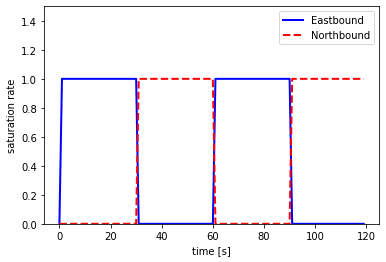

In [3]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0., 120., 1)
e_saturation_rate = [e_controller.saturation_rate(sample) for sample in t]
n_saturation_rate = [n_controller.saturation_rate(sample) for sample in t]

e_line, = plt.plot(t, e_saturation_rate, 'b-', linewidth=2)
e_line.set_label('Eastbound')
n_line, = plt.plot(t, n_saturation_rate, 'r--', linewidth=2)
n_line.set_label('Northbound')

plt.xlabel('time [s]')
plt.ylabel('saturation rate')
plt.ylim([0,1.5])
plt.legend()
plt.show()

*M/M/1 queue*

In [4]:
import MM1Queue

e_queue = MM1Queue.MM1QueueSimulator()
e_queue.initialize(avg_arrival_time=8, avg_departure_time=2)


n_queue = MM1Queue.MM1QueueSimulator()
n_queue.initialize(avg_arrival_time=15, avg_departure_time=2)

In [5]:
delta_t = 0.25
e_queue_length = [0]
e_arrivals = [0]
e_departures = [0]
n_queue_length = [0]
n_arrivals = [0]
n_departures = [0]

while e_queue.time < 600:
    e_queue.run_event(delta_t=delta_t, saturation_rate=e_controller.saturation_rate(e_queue.time))
    e_queue_length += [e_queue.queue.queue_length]
    e_arrivals += [e_queue.arrivals]
    e_departures += [e_queue.departures]
    
    n_queue.run_event(delta_t=delta_t, saturation_rate=n_controller.saturation_rate(n_queue.time))
    n_queue_length += [n_queue.queue.queue_length]
    n_arrivals += [n_queue.arrivals]
    n_departures += [n_queue.departures]

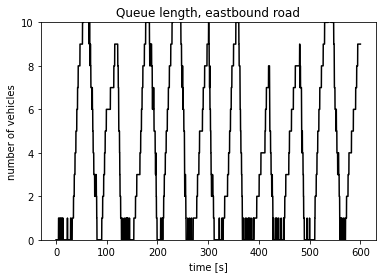

In [6]:
plt.plot(np.arange(0.,600.+delta_t,delta_t), e_queue_length, 'black')
plt.ylim([0,10])
plt.xlabel('time [s]')
plt.ylabel('number of vehicles')
plt.title('Queue length, eastbound road')
plt.show()

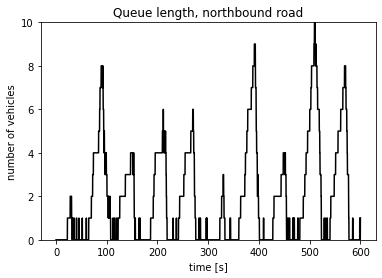

In [7]:
plt.plot(np.arange(0.,600.+delta_t,delta_t), n_queue_length, 'black')
plt.ylim([0,10])
plt.xlabel('time [s]')
plt.ylabel('number of vehicles')
plt.title('Queue length, northbound road')
plt.show()

In [8]:
print('Average wait time, eastbound road: {} s'.format(e_queue.avg_wait_time()))
print('Average wait time, northbound road: {} s'.format(n_queue.avg_wait_time()))

Average wait time, eastbound road: 1.0503956684714701 s
Average wait time, northbound road: 0.46668054977092877 s


**Four-way intersection system**

This system consists of 8 queues in a ++-shape. Queues opposite to each other are controlled by the same on/off-sequence. Vehicles only move forward.

*Traffic lights*

In [9]:
ew1_controller = SimpleTrafficLight()
ew1_controller.initialize(T=60, time_delay=0)

sn1_controller = SimpleTrafficLight()
sn1_controller.initialize(T=60, time_delay=30)

ew2_controller = SimpleTrafficLight()
ew2_controller.initialize(T=60, time_delay=10)

sn2_controller = SimpleTrafficLight()
sn2_controller.initialize(T=60, time_delay=40)

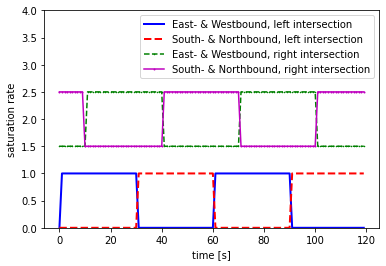

In [10]:
t = np.arange(0., 120., 1)
ew1_saturation_rate = [ew1_controller.saturation_rate(sample) for sample in t]
sn1_saturation_rate = [sn1_controller.saturation_rate(sample) for sample in t]
ew2_saturation_rate = [ew2_controller.saturation_rate(sample)+1.5 for sample in t]
sn2_saturation_rate = [sn2_controller.saturation_rate(sample)+1.5 for sample in t]

ew1_line, = plt.plot(t, ew1_saturation_rate, 'b-', linewidth=2)
ew1_line.set_label('East- & Westbound, left intersection')
sn1_line, = plt.plot(t, sn1_saturation_rate, 'r--', linewidth=2)
sn1_line.set_label('South- & Northbound, left intersection')
ew2_line, = plt.plot(t, ew2_saturation_rate, 'g*--', markersize=1)
ew2_line.set_label('East- & Westbound, right intersection')
sn2_line, = plt.plot(t, sn2_saturation_rate, 'mo-', markersize=1)
sn2_line.set_label('South- & Northbound, right intersection')

plt.xlabel('time [s]')
plt.ylabel('saturation rate')
plt.ylim([0,4])
plt.legend()
plt.show()

*M/M/1 queue*

In [11]:
e1_queue = MM1Queue.MM1QueueSimulator()
e1_queue.initialize(avg_arrival_time=8, avg_departure_time=2)

e2_queue = MM1Queue.ConnectedQueueSimulator()
e2_queue.initialize(avg_departure_time=2)
e1_queue.connect_queue(e2_queue, distance=90)

w1_queue = MM1Queue.ConnectedQueueSimulator()
w1_queue.initialize(avg_departure_time=2)

w2_queue = MM1Queue.MM1QueueSimulator()
w2_queue.initialize(avg_arrival_time=8, avg_departure_time=2)
w2_queue.connect_queue(w1_queue, distance=90)

n1_queue = MM1Queue.MM1QueueSimulator()
n1_queue.initialize(avg_arrival_time=10, avg_departure_time=2)

n2_queue = MM1Queue.MM1QueueSimulator()
n2_queue.initialize(avg_arrival_time=15, avg_departure_time=2)

s1_queue = MM1Queue.MM1QueueSimulator()
s1_queue.initialize(avg_arrival_time=10, avg_departure_time=2)

s2_queue = MM1Queue.MM1QueueSimulator()
s2_queue.initialize(avg_arrival_time=15, avg_departure_time=2)

AttributeError: module 'MM1Queue' has no attribute 'ConnectedMM1QueueSimulator'

In [ ]:
delta_t = 0.25

while e1_queue.time < 600:
    e1_queue.run_event(delta_t=delta_t, saturation_rate=e_controller.saturation_rate(e1_queue.time))
    
    e2_queue.run_event(delta_t=delta_t, saturation_rate=e_controller.saturation_rate(e1_queue.time))
    
    w1_queue.run_event(delta_t=delta_t, saturation_rate=e_controller.saturation_rate(e1_queue.time))

    w2_queue.run_event(delta_t=delta_t, saturation_rate=e_controller.saturation_rate(e1_queue.time))

    n1_queue.run_event(delta_t=delta_t, saturation_rate=n_controller.saturation_rate(e1_queue.time))

    n2_queue.run_event(delta_t=delta_t, saturation_rate=n_controller.saturation_rate(e1_queue.time))
    
    s1_queue.run_event(delta_t=delta_t, saturation_rate=n_controller.saturation_rate(e1_queue.time))

    s2_queue.run_event(delta_t=delta_t, saturation_rate=n_controller.saturation_rate(e1_queue.time))
    
e1_queue_length, e1_departures, e1_arrivals, e1_wait_time = e1_queue.get_stats()
e2_queue_length, e2_departures, e2_arrivals, e2_wait_time = e2_queue.get_stats()
w1_queue_length, w1_departures, w1_arrivals, w1_wait_time = w1_queue.get_stats()
w2_queue_length, w2_departures, w2_arrivals, w2_wait_time = w2_queue.get_stats()
n1_queue_length, n1_departures, n1_arrivals, n1_wait_time = n1_queue.get_stats()
n2_queue_length, n2_departures, n2_arrivals, n2_wait_time = n2_queue.get_stats()
s1_queue_length, s1_departures, s1_arrivals, s1_wait_time = s1_queue.get_stats()
s2_queue_length, s2_departures, s2_arrivals, s2_wait_time = s2_queue.get_stats()

In [ ]:
plt.plot(np.arange(0.,600.+delta_t,delta_t), e2_queue_length, 'black')
#plt.ylim([0,50])
plt.xlabel('time [s]')
plt.ylabel('number of vehicles')
plt.title('Queue length, eastbound road between intersections')
plt.show()

In [ ]:
from scipy.stats import poisson

poisson.cdf(k=0, mu=1/10)